**3.1 MNIST**

In [1]:
# MNIST 데이터 내려받기
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
# X: mnist data, y: mnist target (label)
X, y = mnist["data"], mnist["target"]
print(X.shape, y.shape)

(70000, 784) (70000,)


In [6]:
print(y[0])

# y type 변경 string -> int
import numpy as np

y = y.astype(np.uint8)
print(y[0])

5
5


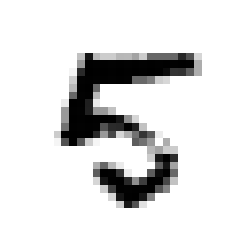

In [38]:
# 예시 이미지 출력
import matplotlib
import matplotlib.pyplot as plt

# 숫자 5 - 예시 이미지로 사용 (index: 0)
some_digit = X[69119]
some_digit_image = some_digit.reshape(28, 28) # 28x28 픽셀 이미지

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [39]:
# train set, test set 분리
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

# shuffle train data index
# np.ndarray type - np.ndarray 타입으로 인덱스 입력받아서 해당 인덱스 순서로 셔플한다.
shuffled_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffled_index], y_train[shuffled_index]

**3.2 이진분류기**

In [40]:
# 숫자 5인지 구분하는 이진분류기
# 5는 True, 나머지는 False
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# 5인지 여부에 대한 label
print(y_train_5)
print(y_test_5)

[False False False ...  True False False]
[False False False ... False  True False]


In [41]:
# 확률적 경사 하강법 (SGD)
from sklearn.linear_model import SGDClassifier

# 숫자 5에 대한 SGD 학습
sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [42]:
sgd_clf.predict([some_digit])

array([ True])

**3.3 성능측정**

In [45]:
# 교차검증을 통한 성능 측정
# 교차검증 - K-fold validation
# - 훈련세트를 fold라는 K개 서브셋으로 무작위 분할
# - 결정 트리 모델을 K번 훈련하고 평가
# - 매 차례에 매번 다른 폴드를 선택해서 평가에 사용하고 나머지 K-1개 폴드로 훈련한다.
from sklearn.model_selection import cross_val_score

# cross_val_score(): 각 fold에서 얻은 예측, 정확도를 반환한다.
# cv - number of folds
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.9468 , 0.95685, 0.9629 ])

In [46]:
# 더미분류기 생성
# BaseEstimator 상속시 get_params(), set_params() 자동생성
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass

  # 모든 데이터에 대해서 0(5가 아님)으로 예측한다.
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

# 더미 분류기에 대한 정확도 측정
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9098 , 0.90815, 0.911  ])

- 전체 데이터 중에 10%만이 5이기 때문에 전부 'False'로 예측하여도 90%의 정확도를 가지게 된다.

In [51]:
# 오차행렬
# 오차행렬을 통한 정확도 검사

# 오차행렬 생성을 위한 데이터 셋
# 예측값 생성
from sklearn.model_selection import cross_val_predict

# k-fold cross validataion으로 예측
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

# confusion_matrix() 함수를 사용해서 오차 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[54362,   217],
       [ 2452,  2969]])

**<오차 행렬>**

[[TN, FP],

[FN, TP]]

- TN: true negative
- FP: false positive
- FN: false negative
- TP: true positive


- 정확도 (precision): TP / (TP + FP)
  - 양성예측의 정확도

- 재현율 (recall):  TP / (TP + FN)
  - 분류기가 정확하게 분류해낸 양성 샘플의 비율 (민감도, sensitivity)

In [52]:
from sklearn.metrics import precision_score, recall_score

# 실제 train set label과 예측값 비교 -> 정밀도(precision), 재현율(recall) 계산
print('정밀도', precision_score(y_train_5, y_train_pred))
print('재현율', recall_score(y_train_5, y_train_pred))

정밀도 0.9318895166352793
재현율 0.547684928979893


- F1 score: 정밀도와 재현율의 조화 평균
  - F1 = TP / (TP + (FN + TP) / 2)

In [53]:
# f1 score 계산
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.6899035668641803

- decision function: 샘플의 점수를 계산해서 점수가 임곗값보다 큰지 작은지를 확인해서 클래스를 반환한다.

In [55]:
# 적절한 임곗값을 구하는 방법

# 1. cross_val_predict()로 모든 샘플의 점수 구하기
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [57]:
# 2. 정밀도와 재현율 계산
from sklearn.metrics import precision_recall_curve

# 정밀도, 재현율, 임곗값
# precision_recall_curve(): 가능한 모든 임곗값에 대한 정밀도와 재현율을 계산
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

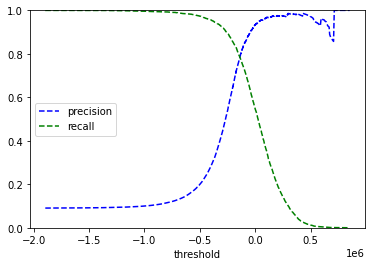

In [58]:
# 3. matplotlib을 통해 정밀도와 재현율 그래프 그리기
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="precision")
  plt.plot(thresholds, recalls[:-1], "g--", label="recall")
  plt.xlabel("threshold")
  plt.legend(loc="center left")
  plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

- 정밀도/재현율 트레이드오프
  - 정밀도와 재현율이 서로 반비례한다.
  - 프로젝트의 성질에 따라 그에 알맞은 임곗값을 설정하여야한다.
  - 그래프에서 알맞은 threshold를 선택하도록 한다.

- ROC 곡선 (수신기 조작 특성, receiver operating characteristic)
  - FPR에 대한 TPR(재현율)의 곡선
  - 

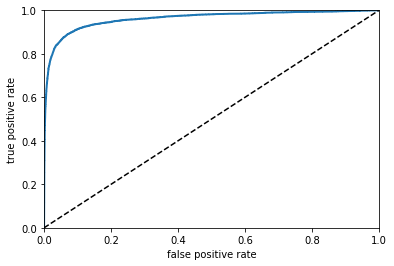

In [60]:
# 3.3.5 ROC 곡선
# ROC 곡선은 민감도(TPR)에 대한 '1 - 특이도(TNR)' 그래프
# tpr / fpr
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

# ROC 곡선 그래프
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('false positive rate')
  plt.ylabel('true positive rate')

plot_roc_curve(fpr, tpr)
plt.show()

- 재현율 (TPR)이 높아질수록 FPR이 높아진다.
- TPR과 FPR에 대한 트레이드 오프
  - 점선에서 멀어질수록 좋은 분류기이다. (FPR에 비해 TPR이 높다.)
  - AUC (곡선 아래의 면적)을 측정하여 분류기를 비교할 수 있다.

In [61]:
# AUC 계산 - 곡선 아래의 면적
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_train_5, y_scores))

0.9616347242025077


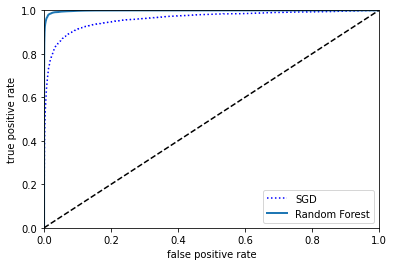

In [63]:
# RandomForestClassifier 모델을 훈련하여 비교
# RandomForestClassifier는 predict_proba() 메서드를 통해 클래스 결정
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 모델 생성
forest_clf = RandomForestClassifier(random_state=42)

# RandomForestClassifier 학습 이후 교차검증 (K-fold validation) 점수 측정
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

# 스코어
y_scores_forest = y_probas_forest[:, 1]

# ROC 곡선 계산 - 각 임계치에서의 fpr, tpr 계산
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

# ROC 곡선 그래프 출력
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [64]:
# AUC 계산
roc_auc_score(y_train_5, y_scores_forest)

0.9985298697268713

**3.4 다중분류**
- 둘 이상의 클래스를 분류하는 분류기
- 이진 분류기를 여러 개 사용해서 다중 클래스를 분류하기도 한다.
  - OvA (one-versus-all): 특정 숫자를 구분하는 이진 분류기를 여러개 훈련시켜서 분류시에 가장 결정 점수가 높은 클래스로 분류하는 방법
  - OvO (one-versus-one): 각 숫자의 조합마다 이진 분류기를 훈련시키는 것
  - 다중 클래스 작업에서 이진 분류 알고리즘을 선택하면 사이킷런에서 자동으로 감지해서 OvA를 적용한다.
    - SVM분류기에서는 OvO를 적용

In [65]:
# SGDClassifier의 다중 분류 확인
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([5], dtype=uint8)

In [66]:
# 10개 클래스 전체에 대해서 점수가 계산되어짐
# 클래스 5의 값이 가장 큰 것을 알 수 있다.
some_digit_scores = sgd_clf.decision_function([some_digit])
print(some_digit_scores)

[[-333348.54120606 -856107.14242136 -382553.14560082 -650159.39292762
  -394818.47853953   50904.94092356 -845098.75153173 -513980.5998483
   -44017.30136859 -359410.10583496]]


In [68]:
# OvO 예시
# OneVsOneClassifier - SGDClassifier 사용 예제
# SGDClassifier를 기반으로 OvO classifier 생성
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
print(ovo_clf.predict([some_digit]))
len(ovo_clf.estimators_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

[5]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


45

- estimators의 개수가 45개 출력된 것을 볼 수 있다.
- OvO는 모든 숫자의 일대일 조합에 대해서 학습하기 때문에 이 경우 0~9까지 10개의 클래스에 대해서 10 * 9 / 2 = 45 만큼의 분류기가 학습된다.

In [69]:
# RandomForestClassifier 훈련 예시
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [70]:
# 이미지 '5'에 대한 분류
forest_clf.predict_proba([some_digit])

# 교차검증 점수 계산
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.87355, 0.8753 , 0.8862 ])

In [71]:
# 입력 스케일 조정 예시
from sklearn.preprocessing import StandardScaler

# 입력값 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# 표준화된 입력값으로 교차검증 점수 측정
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.9061 , 0.91175, 0.9094 ])

- 입력값 스케일 조정을 통해서 정확도를 90% 이상으로 올릴 수 있다.

**3.5 에러분석**

In [72]:
# 오차 행렬 분석을 통한 에러분석
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5723,    3,   24,   10,   11,   52,   50,   10,   35,    5],
       [   1, 6470,   45,   24,    6,   37,    6,    8,  132,   13],
       [  51,   41, 5343,   97,   87,   22,   90,   57,  152,   18],
       [  48,   43,  143, 5330,    4,  231,   36,   53,  141,  102],
       [  16,   29,   35,    8, 5377,   13,   50,   28,   82,  204],
       [  67,   47,   41,  189,   69, 4609,  119,   25,  164,   91],
       [  29,   30,   52,    2,   40,   89, 5623,    5,   48,    0],
       [  21,   25,   65,   23,   60,   11,    6, 5795,   20,  239],
       [  48,  154,   70,  165,   15,  164,   53,   25, 5009,  148],
       [  42,   32,   27,   91,  175,   33,    2,  208,   73, 5266]])

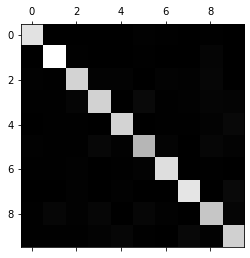

In [73]:
# matshow() 사용하여 이미지로 표현
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

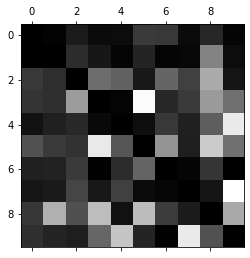

In [74]:
# 오차행렬의 각 값을 클래스 별 이미지 개수로 나누어 에러 비율 비교
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [75]:
# 숫자 그림을 위한 추가 함수
import matplotlib as mpl

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

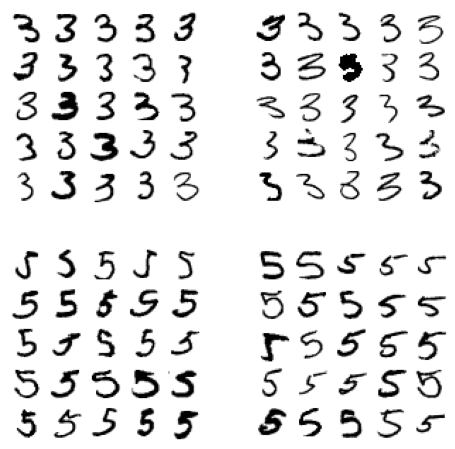

In [76]:
# 3과 5를 잘못 구분한 데이터 샘플
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

**3.6 다중 레이블 분류**
- 여러 개의 이진 레이블을 출력하는 분류 시스템

In [77]:
# knn classifier
from sklearn.neighbors import KNeighborsClassifier

# 첫번째 (y_train_large)는 7 이상의 큰 숫자인지 여부
# 두번쨰 (y_train_odd)는 홀수인지 여부
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [78]:
# 이미지 '5'에 대한 예측
knn_clf.predict([some_digit])

array([[False,  True]])

- 5는 7보다 작기 때문에 False 반환
- 5는 홀수이기 때문에 True 반환

In [ ]:
# 모든 레이블에 대한 f1 score
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

**3.7 다중 출력 분류**
- 다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도로 일반화한 것
- 한 레이블이 값을 여러 개 가질 수 있다.

In [81]:
# 노이즈 추가
from numpy import random as rnd

# 노이즈가 추가된 이미지를 X_train으로 노이즈가 없는 이미지를 y_train으로 학습진행한다.
noise = rnd.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = rnd.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test

In [82]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

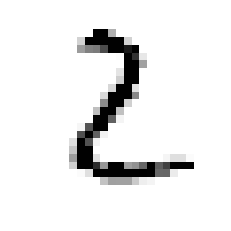

In [83]:
# 노이즈 있는 이미지의 노이즈를 제거
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[1]])
plot_digit(clean_digit)

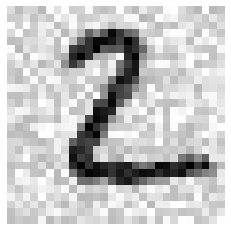

In [84]:
plot_digit(X_test_mod[1])